# Assignment no 62 (Support Vector Machines) (8.4.23)

#### Q1. In order to predict house price based on several characteristics, such as location, square footage, number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this situation would be the best to employ?
Dataset link: https://drive.google.com/file/d/1Z9oLpmt6IDRNw7IeNcHYTGeJRYypRSC0/view?usp=share_link

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

## About this file

Columns:

1. Area Type: Type of Plot
2. Availability: Ready to Move or Not
3. Location: Region of Bangalore
4. Size: BHK
5. Society: Colony in which the House is Present in
6. Total Sq. Ft: Total Area
7. Bath: Number of Bathrooms
8. Balcony: Number of Balconies
9. Price: Cost in Lakhs

In [2]:
df_housing = pd.read_csv("U:/Data Science Masters Program/Assignments/Bengaluru_House_Data.csv")
df_housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


From above we can say that there are 6 features with object datatype and 3 with float datatype.

In [4]:
df_housing[df_housing.columns].select_dtypes("object").columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [5]:
df_housing[df_housing.columns].select_dtypes("number").columns

Index(['bath', 'balcony', 'price'], dtype='object')

In [6]:
df_housing.shape

(13320, 9)

In [7]:
df_housing.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
for column in df_housing.columns:
    print(f"The unique values in column '{column}' are {df_housing[column].unique()} and the count is {len(df_housing[column].unique())}.")
    print()

The unique values in column 'area_type' are ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] and the count is 4.

The unique values in column 'availability' are ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul'] and the count is 81.

The unique values in column 'locat

In [9]:
df_housing.drop('society', axis=1, inplace=True)

In [10]:
df_housing.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [11]:
df_housing['size'].mode()[0]

'2 BHK'

In [12]:
df_housing['size'].replace(to_replace = np.nan, value = df_housing['size'].mode()[0], inplace=True)

In [13]:
df_housing['size'].isnull().sum()

0

In [14]:
df_housing['bath'].mode()[0]

2.0

In [15]:
df_housing['bath'].replace(to_replace = np.nan, value = df_housing['bath'].mode()[0], inplace=True)

In [16]:
df_housing['bath'].isnull().sum()

0

In [17]:
df_housing['balcony'].mode()[0]

2.0

In [18]:
df_housing['balcony'].replace(to_replace = np.nan, value = df_housing['balcony'].mode()[0], inplace=True)

In [19]:
df_housing['balcony'].isnull().sum()

0

In [20]:
df_housing.isnull().sum()

area_type       0
availability    0
location        1
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [21]:
df_housing.dropna(axis=0, inplace=True)

In [22]:
df_housing.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [23]:
df_housing.shape

(13319, 8)

In [24]:
df_housing.duplicated().sum()

569

In [25]:
df_housing.drop_duplicates(inplace=True)

In [26]:
df_housing.duplicated().sum()

0

In [27]:
df_housing.shape

(12750, 8)

In [28]:
df_housing.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [29]:
df_housing[df_housing['price'] == max(df_housing['price'])]

,area_type,availability,location,size,total_sqft,bath,balcony,price
13067,Plot Area,Ready To Move,Defence Colony,10 Bedroom,7150,13.0,2.0,3600.0


In [30]:
df_housing['price'].groupby(df_housing['area_type']).first()

area_type
Built-up  Area           62.00
Carpet  Area             47.00
Plot  Area              120.00
Super built-up  Area     39.07
Name: price, dtype: float64

In [31]:
df_housing['price'].groupby(df_housing['location']).first()

location
 Anekal                  16.00
 Banaswadi               35.00
 Basavangudi             50.00
 Bhoganhalli             22.89
 Devarabeesana Halli     70.00
                         ...  
t.c palya               160.00
tc.palya                 62.00
vinayakanagar           200.00
white field,kadugodi    275.00
whitefiled               32.73
Name: price, Length: 1305, dtype: float64

In [32]:
len(df_housing['location'].unique())

1305

In [33]:
df_housing['size'].str.split(' ').str[0]

0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13316    4
13317    2
13318    4
Name: size, Length: 12750, dtype: object

In [34]:
df_housing['BHK_Count'] = df_housing['size'].str.split(' ').str[0]
df_housing['BHK_Count'] = df_housing['BHK_Count'].astype(int)
df_housing.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Count
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [35]:
df_housing['BHK_Count'].dtypes

dtype('int32')

In [37]:
range_sqft = []

for value in df_housing['total_sqft']:
    if len(value) > 4:
        range_sqft.append(value)

range_sqft



['2100 - 2850',
 '1330.74',
 '3010 - 3410',
 '2957 - 3450',
 '3067 - 8156',
 '1042 - 1105',
 '1563.05',
 '1145 - 1340',
 '1015 - 1540',
 '1520 - 1740',
 '2023.71',
 '1113.27',
 '12000',
 '34.46Sq. Meter',
 '11890',
 '1752.12',
 '1195 - 1440',
 '1200 - 2400',
 '12000',
 '4125Perch',
 '1120 - 1145',
 '4400 - 6640',
 '3090 - 5002',
 '35000',
 '4400 - 6800',
 '1160 - 1195',
 '1000Sq. Meter',
 '4000 - 5249',
 '10961',
 '1115 - 1130',
 '1100Sq. Yards',
 '520 - 645',
 '1000 - 1285',
 '3606 - 5091',
 '650 - 665',
 '633 - 666',
 '2112.95',
 '5.31Acres',
 '30Acres',
 '1445 - 1455',
 '884 - 1116',
 '850 - 1093',
 '14000',
 '1440 - 1884',
 '1558.67',
 '3467.86',
 '716Sq. Meter',
 '547.34 - 827.31',
 '804.1',
 '580 - 650',
 '3425 - 3435',
 '1269.72',
 '1804 - 2273',
 '3630 - 3800',
 '660 - 670',
 '4000 - 5249',
 '1500Sq. Meter',
 '620 - 933',
 '142.61Sq. Meter',
 '2695 - 2940',
 '2000 - 5634',
 '1574Sq. Yards',
 '3450 - 3472',
 '52272',
 '2479.13',
 '2172.65',
 '581.91',
 '1250 - 1305',
 '670 - 980

In [41]:
# Define a function to convert values to integers
def convert_to_float(value_str):
    # Handle range values
    if '-' in value_str:
        low, high = map(float, value_str.split(' - '))
        return (low + high) / 2
    # Handle numeric values
    elif value_str.replace('.', '', 1).isdigit():
        return float(value_str)
    # Handle non-numeric values
    else:
        return None

# Apply the function to the values column
df_housing['total_sqft'] = df_housing['total_sqft'].apply(convert_to_float)

In [44]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12750 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12750 non-null  object 
 1   availability  12750 non-null  object 
 2   location      12750 non-null  object 
 3   size          12750 non-null  object 
 4   total_sqft    12704 non-null  float64
 5   bath          12750 non-null  float64
 6   balcony       12750 non-null  float64
 7   price         12750 non-null  float64
 8   BHK_Count     12750 non-null  int32  
dtypes: float64(4), int32(1), object(4)
memory usage: 946.3+ KB


In [46]:
df_housing.shape

(12750, 9)

In [48]:
df_housing.dropna(inplace=True)

In [49]:
df_housing.shape

(12704, 9)

In [50]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12704 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12704 non-null  object 
 1   availability  12704 non-null  object 
 2   location      12704 non-null  object 
 3   size          12704 non-null  object 
 4   total_sqft    12704 non-null  float64
 5   bath          12704 non-null  float64
 6   balcony       12704 non-null  float64
 7   price         12704 non-null  float64
 8   BHK_Count     12704 non-null  int32  
dtypes: float64(4), int32(1), object(4)
memory usage: 942.9+ KB


In [54]:
df_housing.describe().round()

,total_sqft,bath,balcony,price,BHK_Count
count,12704.0,12704.0,12704.0,12704.0,12704.0
mean,1571.0,3.0,2.0,114.0,3.0
std,1262.0,1.0,1.0,152.0,1.0
min,1.0,1.0,0.0,8.0,1.0
25%,1100.0,2.0,1.0,50.0,2.0
50%,1282.0,2.0,2.0,73.0,3.0
75%,1692.0,3.0,2.0,121.0,3.0
max,52272.0,40.0,3.0,3600.0,43.0


In [57]:
import matplotlib.pyplot as plt

<Axes: >

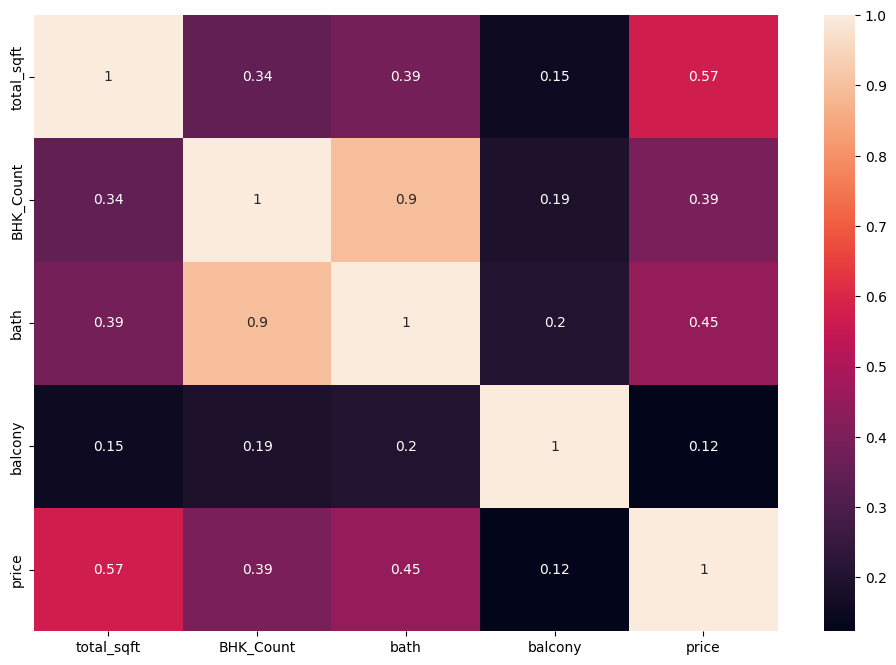

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(df_housing[['total_sqft','BHK_Count','bath','balcony','price']].corr(), annot=True)

In [61]:
X = df_housing.drop(columns=['area_type','availability','location','size','price'], axis=1)
y = df_housing['price']

In [62]:
X.head()

,total_sqft,bath,balcony,BHK_Count
0,1056.0,2.0,1.0,2
1,2600.0,5.0,3.0,4
2,1440.0,2.0,3.0,3
3,1521.0,3.0,1.0,3
4,1200.0,2.0,1.0,2


In [63]:
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10163, 4), (2541, 4), (10163,), (2541,))

In [99]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [100]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [101]:
y_pred = svr.predict(X_test).round(2)
y_pred

array([145.15,  57.35, 278.95, ..., 243.56,  38.45,  42.46])

In [102]:
mean_absolute_error(y_test, y_pred).round(2)

47.98

In [103]:
mean_squared_error(y_test, y_pred).round(2)

20262.94

In [104]:
(mean_squared_error(y_test, y_pred).round(2))*0.5

10131.47

In [105]:
r2_score(y_test, y_pred).round(2)

0.27

#### Q2. You have built an SVM regression model and are trying to decide between using MSE or R-squared as your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price of a house as accurately as possible?

**Ans -**
If the goal is to predict the actual price of a house as accurately as possible, then **RMSE (Root Mean Squared Error)** would be a more appropriate evaluation metric for your SVM regression model. RMSE tells us how far apart the predicted values are from the observed values in a dataset, on average. The lower the RMSE, the better a model fits a dataset¹.

On the other hand, **R-squared** tells us the proportion of the variance in the response variable of a regression model that can be explained by the predictor variables. This value ranges from 0 to 1. The higher the R-squared value, the better a model fits a dataset.

When assessing how well a model fits a dataset, it’s useful to calculate both the RMSE and the R-squared value because each metric tells us something different. However, if your goal is to predict the actual price of a house as accurately as possible, then RMSE would be more appropriate as it tells us the typical distance between the predicted value made by the regression model and the actual value.

#### Q3. You have a dataset with a significant number of outliers and are trying to select an appropriate regression metric to use with your SVM model. Which metric would be the most appropriate in this scenario?

**Ans -** In the presence of outliers, a useful way of dealing with them is by running a **robust regression**, or a regression that adjusts the weights assigned to each observation in order to reduce the skew resulting from the outliers.

There are several robust regression techniques that can be used, such as **Huber regression** and **Ridge regression**. If the outliers in the dataset have a larger impact on the result than the non-outliers, then Huber Regressor is the preferred algorithm. If the outliers have a smaller impact on the result and the dataset has a high number of features, then Ridge Regression is the preferred algorithm.

It's important to note that when using robust regression methods, some traditional evaluation metrics such as R-squared may not be appropriate or may need to be calculated differently.

#### Q4. You have built an SVM regression model using a polynomial kernel and are trying to select the best metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values are very close. Which metric should you choose to use in this case?

**Ans -** MSE (Mean Squared Error) and RMSE (Root Mean Squared Error) are both measures of the average squared error between the predicted and actual values. The difference between the two is that RMSE is the square root of MSE. Since RMSE is in the same unit as the predicted and actual values, it is easier to interpret than MSE.

In your case, since both MSE and RMSE values are very close, you can use either metric to evaluate the performance of your SVM regression model. However, RMSE might be easier to interpret as it is in the same unit as the predicted and actual values.

#### Q5. You are comparing the performance of different SVM regression models using different kernels (linear, polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most appropriate if your goal is to measure how well the model explains the variance in the target variable?

**Ans-** If your goal is to measure how well the model explains the variance in the target variable, then **R-squared** would be the most appropriate evaluation metric to use when comparing the performance of different SVM regression models using different kernels (linear, polynomial, and RBF).

R-squared tells us the proportion of the variance in the response variable of a regression model that can be explained by the predictor variables. This value ranges from 0 to 1. The higher the R-squared value, the better a model fits a dataset.

On the other hand, metrics such as MSE (Mean Squared Error) and RMSE (Root Mean Squared Error) tell us how far apart the predicted values are from the observed values in a dataset, on average. These metrics are more appropriate if your goal is to predict the actual value of the target variable as accurately as possible.